In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from model import *
import h5py
from tensorflow.python.keras.utils.io_utils import HDF5Matrix

Using TensorFlow backend.


In [2]:
file_path = 'data.h5'
## Data load
images = HDF5Matrix(file_path,'images')
labels = HDF5Matrix(file_path,'labels')

Instructions for updating:
Training with HDF5Matrix is not optimized for performance. Instead, we recommend using https://github.com/tensorflow/io to load your HDF5 data into a tf.data Dataset and passing that dataset to Keras.


/usr/local/lib/python2.7/dist-packages/tensorflow_core/python/keras/utils/io_utils.py:89: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(datapath)


In [3]:
back = np.zeros((256,256,3))

index = np.argmax(labels[10], axis = -1)
print(index.shape)

for pixel in index:
    print(pixel)

(256, 256)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  9  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11 11
 11 11 11 11 11 11 11 11 11 11 11  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0
 

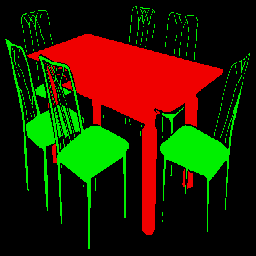

In [4]:
for r in range(256):
    for c in range(256):
        if(index[r,c] == 1):
            back[r,c] = [0, 0, 240]
        if(index[r,c] == 11):
            back[r,c] = [240, 0, 0]
        if(index[r,c] == 9):
            back[r,c] = [0, 240, 0]
        if(index[r,c] == 12):
            back[r,c] = [120, 120, 0]

back = back.astype(np.uint8)
back_image = Image.fromarray(back)
back_image

In [5]:
model = unet()

model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("in...)`
  model = Model(input = inputs, output = conv10)


In [6]:
model_checkpoint = ModelCheckpoint('model.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit(images, labels, epochs=50, batch_size = 32,callbacks=[model_checkpoint],shuffle="batch")

Epoch 1/50
2900/2900 [==============================] - 148s 51ms/step - loss: 0.5549 - accuracy: 0.7391

Epoch 00001: loss improved from inf to 0.55494, saving model to model.hdf5
Epoch 2/50
2900/2900 [==============================] - 137s 47ms/step - loss: 0.4303 - accuracy: 0.7690

Epoch 00002: loss improved from 0.55494 to 0.43032, saving model to model.hdf5
Epoch 3/50
2900/2900 [==============================] - 137s 47ms/step - loss: 0.2523 - accuracy: 0.9148

Epoch 00003: loss improved from 0.43032 to 0.25227, saving model to model.hdf5
Epoch 4/50
2900/2900 [==============================] - 137s 47ms/step - loss: 0.1479 - accuracy: 0.9743

Epoch 00004: loss improved from 0.25227 to 0.14794, saving model to model.hdf5
Epoch 5/50
2900/2900 [==============================] - 138s 48ms/step - loss: 0.1227 - accuracy: 0.9752

Epoch 00005: loss improved from 0.14794 to 0.12274, saving model to model.hdf5
Epoch 6/50
2900/2900 [==============================] - 138s 48ms/step - loss: 

2900/2900 [==============================] - 136s 47ms/step - loss: 0.0316 - accuracy: 0.9894

Epoch 00045: loss improved from 0.03340 to 0.03161, saving model to model.hdf5
Epoch 46/50
2900/2900 [==============================] - 136s 47ms/step - loss: 0.0295 - accuracy: 0.9900

Epoch 00046: loss improved from 0.03161 to 0.02946, saving model to model.hdf5
Epoch 47/50
2900/2900 [==============================] - 136s 47ms/step - loss: 0.0276 - accuracy: 0.9905

Epoch 00047: loss improved from 0.02946 to 0.02757, saving model to model.hdf5
Epoch 48/50
2900/2900 [==============================] - 136s 47ms/step - loss: 0.0266 - accuracy: 0.9908

Epoch 00048: loss improved from 0.02757 to 0.02661, saving model to model.hdf5
Epoch 49/50
2900/2900 [==============================] - 136s 47ms/step - loss: 0.0248 - accuracy: 0.9913

Epoch 00049: loss improved from 0.02661 to 0.02476, saving model to model.hdf5
Epoch 50/50
2900/2900 [==============================] - 136s 47ms/step - loss: 0.

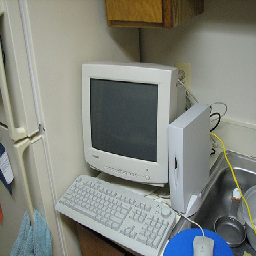

In [7]:
cur_path = os.getcwd()
test_image = Image.open(cur_path+"/data/image/0.png")
test_image = test_image.resize((256,256))
test_image

In [8]:
test = np.ones((1,256,256,3)).astype('float32')
test_arr = np.array(test_image).astype('float32')
test_arr = test_arr/255
test[0] = test_arr

In [9]:
test_result = model.predict(test)

In [21]:
back = np.zeros((256,256,3)).astype('float32')

index = np.argmax(test_result[0], axis = -1)
print(index.shape)

for pixel in index:
    print(pixel)

(256, 256)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 

In [22]:
for r in range(256):
    for c in range(256):
        if(index[r,c]== 20):
            back[r,c] = [0,0,240]

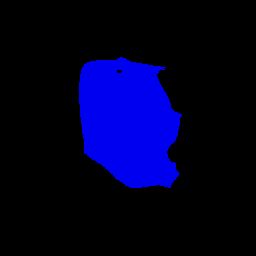

In [23]:
back = back.astype('uint8')
back_image = Image.fromarray(back, mode='RGB')
back_image